In [ ]:
!pip install osmnx

In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def load_berlin_road_network():
    # Get the road network for Berlin
    G = ox.graph_from_address('Adalbertstraße 58, Berlin, Germany', dist=1000, network_type='drive')
    
    return G

def plot_network(G):
    fig, ax = ox.plot_graph(G, figsize=(10,10))
    
    return fig, ax

In [4]:
berlin_network = load_berlin_road_network()

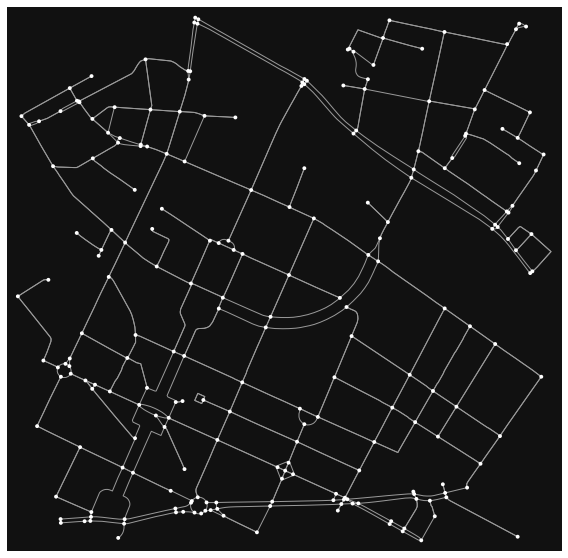

(<Figure size 720x720 with 1 Axes>, <Axes: >)

In [5]:
plot_network(berlin_network)

In [6]:
import osmnx as ox
import networkx as nx
import random

class Car:
    def __init__(self, start, destination):
        self.current_location = start
        self.destination = destination
        self.path = []

def move_cars(G, cars):
    for car in cars:
        if not car.path:
            # Determine path based on shortest route
            car.path = nx.shortest_path(G, car.current_location, car.destination, weight="travel_time")
        
        # Check if car has reached its destination
        if car.current_location == car.destination:
            continue

        next_node = car.path.pop(0)
        
        # Simulate traffic jam: if there are more than 'x' cars on an edge, slow down
        cars_on_edge = sum(1 for c in cars if c.current_location == car.current_location and c.path and c.path[0] == next_node)
        if cars_on_edge > 5:  # Arbitrary threshold for a "jam"
            car.path.insert(0, next_node)  # Car stays in the same spot
        else:
            car.current_location = next_node

def simulate_traffic(G, num_cars=100, num_steps=10):
    # Create cars with random starts and destinations
    nodes = list(G.nodes())
    cars = [Car(random.choice(nodes), random.choice(nodes)) for _ in range(num_cars)]
    
    for step in range(num_steps):
        move_cars(G, cars)

        # For demonstration, print the number of cars at each node
        node_counts = {node: 0 for node in nodes}
        for car in cars:
            node_counts[car.current_location] += 1
        print(f"Step {step + 1}:")
        '''
        # NOTE: I commented this out because it produces way too much output
        for node, count in node_counts.items():
            if count:
                print(f"Node {node}: {count} cars")
        '''

                
G = ox.graph_from_address('Adalbertstraße 58, Berlin, Germany', dist=1000, network_type='drive')

# Add a 'travel_time' attribute to each edge to use as weight (for now, assume time is inversely proportional to speed limit, with a default of 30 km/h)
for u, v, k, data in G.edges(data=True, keys=True):
    speed = data.get("maxspeed", 30)
    if isinstance(speed, list):  # There can be multiple speed limits; take the first one as representative
        speed = speed[0]
    data["travel_time"] = data["length"] / (float(speed) * 1000/60)  # length in meters, speed in km/h, result in minutes

simulate_traffic(G)

Step 1:
Step 2:
Step 3:
Step 4:
Step 5:
Step 6:
Step 7:
Step 8:
Step 9:
Step 10:


In [7]:
import osmnx as ox
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

def edge_car_counts(G, cars):
    counts = {(u, v, 0): 0 for u, v, _ in G.edges(keys=True)}
    for car in cars:
        if car.path:
            next_node = car.path[0]
            counts[(car.current_location, next_node, 0)] += 1
    return counts

def plot_network_with_traffic(G, cars):
    edge_colors = []
    edge_widths = []

    counts = edge_car_counts(G, cars)
    max_count = max(counts.values())

    for _, _, _, data in G.edges(data=True, keys=True):
        count = counts.get((data['osmid'], data['osmid'], 0), 0)
        edge_colors.append(plt.cm.Reds(count / max_count))
        edge_widths.append(1 + count)

    fig, ax = ox.plot_graph(G, figsize=(10,10), edge_color=edge_colors, edge_linewidth=edge_widths)
    return fig, ax

G = ox.graph_from_address('Adalbertstraße 58, Berlin, Germany', dist=1000, network_type='drive')

simulate_traffic(G)
plot_network_with_traffic(G, cars)

NetworkXNoPath: No path between 29218289 and 29217303.